# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from dstapi import DstApi

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
#import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We will start by read and clean our data. In this project we investigate two datasets from Denmark Statistics: Life expectancy and the highest completed education across the provinces in Denmark.
We start by read and clean the dataset for the life expectancy, and afterwards we do it for the level of education.

In [13]:
#We start by loading the dataset for the life expectancy from Denmark Statistics.
hisb77_api = DstApi('HISB77') 
params = hisb77_api._define_base_params(language='en')
hisb77 = hisb77_api.get_data(params=params)
display(hisb77)

,OMRÅDE,KØN,TID,INDHOLD
0,All Denmark,Women,2001:2002,79.2
1,All Denmark,Men,2002:2003,74.9
2,All Denmark,Total,2003:2004,77.5
3,All Denmark,Women,2005:2006,80.5
4,All Denmark,Men,2006:2007,76.0
...,...,...,...,...
823,Province Bornholm,Total,2014:2015,79.9
824,Province Nordjylland,Men,2010:2011,77.9
825,All Denmark,Total,2013:2014,80.6
826,Province Nordjylland,Total,2010:2011,79.7


In [14]:
#We start by dropping the column "Men" and "women" in the column "Køn", since we do not want to look at the difference between the gender across the provinces.
hisb77 = hisb77[hisb77['KØN'] == 'Total']
# Display the modified dataset
display(hisb77)

,OMRÅDE,KØN,TID,INDHOLD
2,All Denmark,Total,2003:2004,77.5
5,All Denmark,Total,2007:2008,78.5
8,Province Byen København,Total,2002:2003,75.4
11,Province Byen København,Total,2006:2007,76.5
14,Province Københavns omegn,Total,2001:2002,76.8
...,...,...,...,...
814,Province Københavns omegn,Total,2010:2011,79.3
823,Province Bornholm,Total,2014:2015,79.9
825,All Denmark,Total,2013:2014,80.6
826,Province Nordjylland,Total,2010:2011,79.7


In [15]:
#Now we rename the variables.
hisb77.rename(columns = {'OMRÅDE':'Province', 'KØN':"Gender", 'TID':'Year', 'INDHOLD':'Life expectancy'}, inplace=True)
hisb77.head(5)

,Province,Gender,Year,Life expectancy
2,All Denmark,Total,2003:2004,77.5
5,All Denmark,Total,2007:2008,78.5
8,Province Byen København,Total,2002:2003,75.4
11,Province Byen København,Total,2006:2007,76.5
14,Province Københavns omegn,Total,2001:2002,76.8


In [16]:
#Now we sort the dataset by 'Province'.
hisb77_sorted = hisb77.sort_values(by=['Province', 'Year'], inplace=True)
# Display the sorted dataset
display(hisb77)

,Province,Gender,Year,Life expectancy
621,All Denmark,Total,2000:2001,76.9
415,All Denmark,Total,2001:2002,76.9
209,All Denmark,Total,2002:2003,77.2
2,All Denmark,Total,2003:2004,77.5
624,All Denmark,Total,2004:2005,77.9
...,...,...,...,...
544,Province Østsjælland,Total,2018:2019,81.5
562,Province Østsjælland,Total,2019:2020,81.9
571,Province Østsjælland,Total,2020:2021,81.8
526,Province Østsjælland,Total,2021:2022,81.7


In [17]:
#We will now reset the index.
hisb77.reset_index(inplace=True, drop=True)
display(hisb77)

,Province,Gender,Year,Life expectancy
0,All Denmark,Total,2000:2001,76.9
1,All Denmark,Total,2001:2002,76.9
2,All Denmark,Total,2002:2003,77.2
3,All Denmark,Total,2003:2004,77.5
4,All Denmark,Total,2004:2005,77.9
...,...,...,...,...
271,Province Østsjælland,Total,2018:2019,81.5
272,Province Østsjælland,Total,2019:2020,81.9
273,Province Østsjælland,Total,2020:2021,81.8
274,Province Østsjælland,Total,2021:2022,81.7


In [18]:
#Now we delete the column "Køn".
drop_these = ['Gender']
print(drop_these)
hisb77.drop(drop_these, axis=1, inplace=True)
display(hisb77)

['Gender']


,Province,Year,Life expectancy
0,All Denmark,2000:2001,76.9
1,All Denmark,2001:2002,76.9
2,All Denmark,2002:2003,77.2
3,All Denmark,2003:2004,77.5
4,All Denmark,2004:2005,77.9
...,...,...,...
271,Province Østsjælland,2018:2019,81.5
272,Province Østsjælland,2019:2020,81.9
273,Province Østsjælland,2020:2021,81.8
274,Province Østsjælland,2021:2022,81.7


We will now load and clean the dataset for the highest completed education across provinces in Denmark.

In [19]:
#We load the data for highest completed education
education = pd.read_excel('HFUDD11.xlsx')
display(education)

,"Educational attainment (15-69 years) by time, region and highest education completed",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Units: Number,NaN,NaN,NaN,NaN
1,NaN,NaN,Total,H70 Masters programs,Proportion
2,2022,All Denmark,4093404,470853,0.115027
3,NaN,Province Byen København,623705,148355,0.237861
4,NaN,Province Københavns omegn,382522,56632,0.148049
5,NaN,Province Nordsjælland,308911,44688,0.144663
6,NaN,Province Bornholm,25567,1357,0.053076
7,NaN,Province Østsjælland,172688,18254,0.105705
8,NaN,Province Vest- og Sydsjælland,398334,19881,0.04991
9,NaN,Province Fyn,345607,29067,0.084104


In [20]:
#Skipping the 2 first rows and the two last rows
education = pd.read_excel('HFUDD11.xlsx', skiprows=2)
education = education[:-2]
display(education)

,Unnamed: 0,Unnamed: 1,Total,H70 Masters programs,Proportion
0,2022,All Denmark,4093404.0,470853.0,0.115027
1,NaN,Province Byen København,623705.0,148355.0,0.237861
2,NaN,Province Københavns omegn,382522.0,56632.0,0.148049
3,NaN,Province Nordsjælland,308911.0,44688.0,0.144663
4,NaN,Province Bornholm,25567.0,1357.0,0.053076
5,NaN,Province Østsjælland,172688.0,18254.0,0.105705
6,NaN,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910
7,NaN,Province Fyn,345607.0,29067.0,0.084104
8,NaN,Province Sydjylland,493289.0,31048.0,0.062941
9,NaN,Province Østjylland,648173.0,75017.0,0.115736


In [21]:
#Dropping the first column
drop_these = ['Unnamed: 0']
print(drop_these)
education.drop(drop_these, axis=1, inplace=True)
display(education)

['Unnamed: 0']


,Unnamed: 1,Total,H70 Masters programs,Proportion
0,All Denmark,4093404.0,470853.0,0.115027
1,Province Byen København,623705.0,148355.0,0.237861
2,Province Københavns omegn,382522.0,56632.0,0.148049
3,Province Nordsjælland,308911.0,44688.0,0.144663
4,Province Bornholm,25567.0,1357.0,0.053076
5,Province Østsjælland,172688.0,18254.0,0.105705
6,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910
7,Province Fyn,345607.0,29067.0,0.084104
8,Province Sydjylland,493289.0,31048.0,0.062941
9,Province Østjylland,648173.0,75017.0,0.115736


In [22]:
#Now we rename the variables.
education.rename(columns = {'Unnamed: 1':'Province', 'Total':"Total education", 'H70 Masters programs':'Masters programs', 'Proportion':'Proportion with a Master program'}, inplace=True)
display(education)

,Province,Total education,Masters programs,Proportion with a Master program
0,All Denmark,4093404.0,470853.0,0.115027
1,Province Byen København,623705.0,148355.0,0.237861
2,Province Københavns omegn,382522.0,56632.0,0.148049
3,Province Nordsjælland,308911.0,44688.0,0.144663
4,Province Bornholm,25567.0,1357.0,0.053076
5,Province Østsjælland,172688.0,18254.0,0.105705
6,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910
7,Province Fyn,345607.0,29067.0,0.084104
8,Province Sydjylland,493289.0,31048.0,0.062941
9,Province Østjylland,648173.0,75017.0,0.115736


## Explore each data set

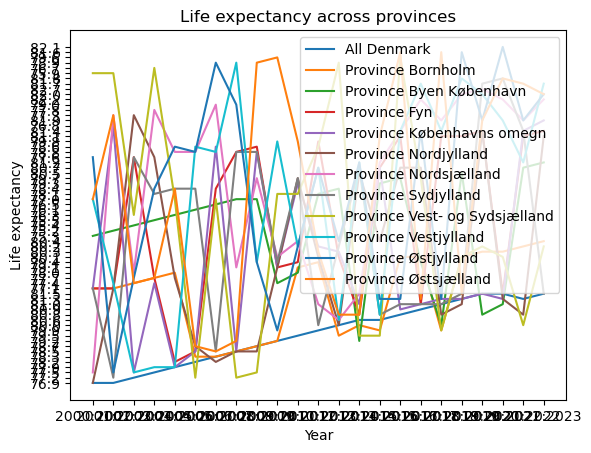

In [34]:
fig, ax = plt.subplots()

# Iterér gennem unikke værdier af 'Landsdel' og plot hver landsdel separat
for province, group in hisb77.groupby('Province'):
    ax.plot(group['Year'], group['Life expectancy'], label=province)

# Tilføj akseetiketter og titler
ax.set_xlabel('Year')
ax.set_ylabel('Life expectancy')
ax.set_title('Life expectancy across provinces')

# Tilføj en legend
ax.legend()

# Vis figuren
plt.show()

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [23]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

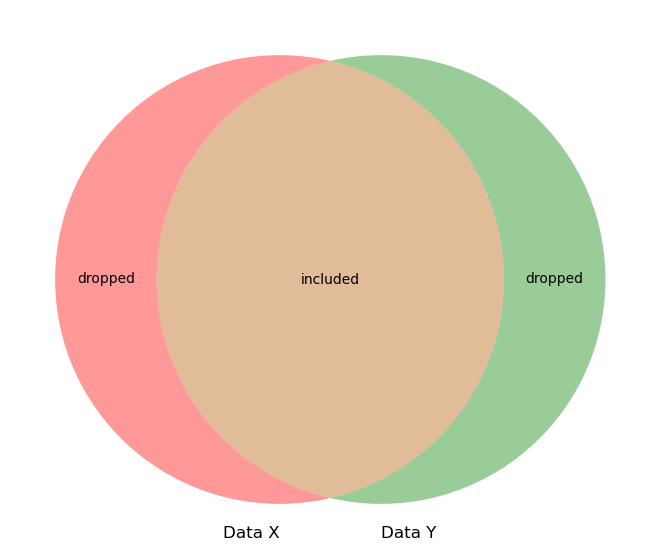

In [24]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.